<a href="https://colab.research.google.com/github/vmarocha/FinanceAI/blob/main/FinanceAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                feature        VIF
0          S&P Previous   2.321208
1              FEDFUNDS  17.267488
2               PSAVERT  11.007441
3               WTISPLC   5.957349
4                PERMIT  12.224839
5                T10Y2Y   2.332368
6  CORESTICKM159SFRBATL  19.072624
0.9998346945268146
MSE:  169.77386562792745
RMSE:  13.029730067347039
r2 score for Linear Regression is 0.9998346945268146


<ipython-input-30-72b67e075ca2>:246: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


R-squared: 0.9999706503485213
MSE:  196.8645337403985
RMSE:  14.030842232040046
r2 score for Random Forest model is 0.9998083168761988


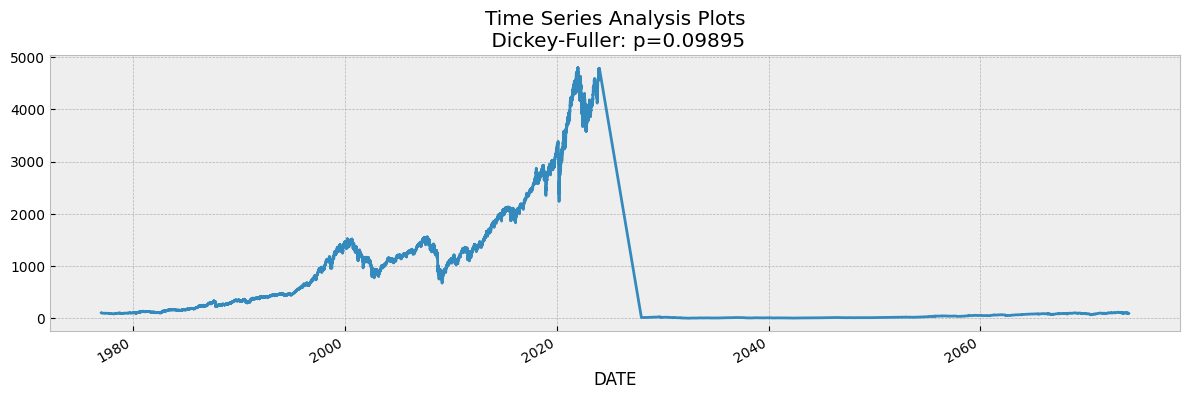

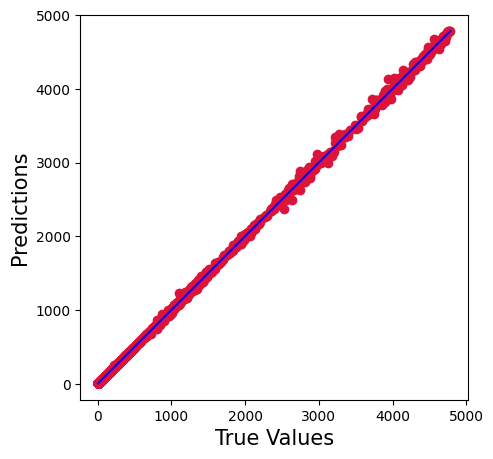

[[4783.45, 4.1, 71.9, 1467, 5.33, -0.18, 4.58419]]
Linear Regression Prediction: 
4784.444181517106
Random Forest Prediction: 
4781.694600000001


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import yfinance as yf

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


def tsplot(y, figsize=(12, 7), syle='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,1)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))

        plt.tight_layout()

gdp_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=1947-01-01&coed=2023-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1947-01-01"
unemployment_rate_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2023-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1948-01-01"
unemployment_total_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNEMPLOY&scale=left&cosd=1948-01-01&coed=2023-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1948-01-01"
inflation_data_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CORESTICKM159SFRBATL&scale=left&cosd=1967-12-01&coed=2023-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-16&revision_date=2024-01-16&nd=1967-12-01"
fed_funds_rate_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FEDFUNDS&scale=left&cosd=1954-07-01&coed=2023-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1954-07-01"
currency_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CURRCIR&scale=left&cosd=1917-08-01&coed=2023-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1917-08-01"
personal_savings_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=PSAVERT&scale=left&cosd=1959-01-01&coed=2023-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1959-01-01"
permit_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=PERMIT&scale=left&cosd=1960-01-01&coed=2023-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-14&revision_date=2024-01-14&nd=1960-01-01"
housing_starts_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=HOUST&scale=left&cosd=1959-01-01&coed=2023-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1959-01-01"
emp_pop_ratio_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=EMRATIO&scale=left&cosd=1948-01-01&coed=2023-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1948-01-01"
oil_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=WTISPLC&scale=left&cosd=1946-01-01&coed=2023-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1946-01-01"
three_month_bill_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=TB3MS&scale=left&cosd=1934-01-01&coed=2023-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1934-01-01"
ten_two_yield_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=T10Y2Y&scale=left&cosd=1976-06-01&coed=2024-01-12&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-15&revision_date=2024-01-15&nd=1976-06-01"
capacity_util_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=TCU&scale=left&cosd=1967-01-01&coed=2023-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-16&revision_date=2024-01-16&nd=1967-01-01"
real_di_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DSPIC96&scale=left&cosd=1959-01-01&coed=2023-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-16&revision_date=2024-01-16&nd=1959-01-01"
pce_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=PCE&scale=left&cosd=1959-01-01&coed=2023-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-16&revision_date=2024-01-16&nd=1959-01-01"
industrial_production_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=INDPRO&scale=left&cosd=1919-01-01&coed=2023-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-01-16&revision_date=2024-01-16&nd=1919-01-01"

# Read the CSV's into dataframes
gdp_dataframe = pd.read_csv(gdp_url)
unemployment_rate_dataframe = pd.read_csv(unemployment_rate_url)
unemployment_total_dataframe = pd.read_csv(unemployment_total_url)
inflation_dataframe = pd.read_csv(inflation_data_url)
fed_funds_dataframe = pd.read_csv(fed_funds_rate_url)
currency_dataframe = pd.read_csv(currency_url)
personal_savings_dataframe = pd.read_csv(personal_savings_url)
permit_dataframe = pd.read_csv(permit_url)
housing_starts_dataframe = pd.read_csv(housing_starts_url)
emp_pop_ratio_dataframe = pd.read_csv(emp_pop_ratio_url)
oil_dataframe = pd.read_csv(oil_url)
three_month_bill_dataframe = pd.read_csv(three_month_bill_url)
ten_two_yield_dataframe = pd.read_csv(ten_two_yield_url)
capacity_util_dataframe = pd.read_csv(capacity_util_url)
real_di_dataframe = pd.read_csv(real_di_url)
pce_dataframe = pd.read_csv(pce_url)
industrial_production_dataframe = pd.read_csv(industrial_production_url)


sp_500_dataframe = pd.read_csv('sample_data/SPX.csv')

# sp_500_dataframe = yf.download('^GSPC', start='1985-01-01', end='2024-01-15', interval='1mo')

gdp_dataframe['DATE'] = pd.to_datetime(gdp_dataframe['DATE'])
gdp_dataframe = gdp_dataframe.set_index('DATE')
gdp_dataframe = gdp_dataframe.loc[gdp_dataframe.index >= '1977-01-01']

unemployment_rate_dataframe['DATE'] = pd.to_datetime(unemployment_rate_dataframe['DATE'])
unemployment_rate_dataframe = unemployment_rate_dataframe.set_index('DATE')
unemployment_rate_dataframe = unemployment_rate_dataframe.loc[unemployment_rate_dataframe.index >= '1977-01-01']

unemployment_total_dataframe['DATE'] = pd.to_datetime(unemployment_total_dataframe['DATE'])
unemployment_total_dataframe = unemployment_total_dataframe.set_index('DATE')
unemployment_total_dataframe = unemployment_total_dataframe.loc[unemployment_total_dataframe.index >= '1977-01-01']

inflation_dataframe['DATE'] = pd.to_datetime(inflation_dataframe['DATE'])
inflation_dataframe = inflation_dataframe.set_index('DATE')
inflation_dataframe = inflation_dataframe.loc[inflation_dataframe.index >= '1977-01-01']

fed_funds_dataframe['DATE'] = pd.to_datetime(fed_funds_dataframe['DATE'])
fed_funds_dataframe = fed_funds_dataframe.set_index('DATE')
fed_funds_dataframe = fed_funds_dataframe.loc[fed_funds_dataframe.index >= '1977-01-01']

currency_dataframe['DATE'] = pd.to_datetime(currency_dataframe['DATE'])
currency_dataframe = currency_dataframe.set_index('DATE')
currency_dataframe = currency_dataframe.loc[currency_dataframe.index >= '1977-01-01']

personal_savings_dataframe['DATE'] = pd.to_datetime(personal_savings_dataframe['DATE'])
personal_savings_dataframe = personal_savings_dataframe.set_index('DATE')
personal_savings_dataframe = personal_savings_dataframe.loc[personal_savings_dataframe.index >= '1977-01-01']

permit_dataframe['DATE'] = pd.to_datetime(permit_dataframe['DATE'])
permit_dataframe = permit_dataframe.set_index('DATE')
permit_dataframe = permit_dataframe.loc[permit_dataframe.index >= '1977-01-01']

housing_starts_dataframe['DATE'] = pd.to_datetime(housing_starts_dataframe['DATE'])
housing_starts_dataframe = housing_starts_dataframe.set_index('DATE')
housing_starts_dataframe = housing_starts_dataframe.loc[housing_starts_dataframe.index >= '1977-01-01']

emp_pop_ratio_dataframe['DATE'] = pd.to_datetime(emp_pop_ratio_dataframe['DATE'])
emp_pop_ratio_dataframe = emp_pop_ratio_dataframe.set_index('DATE')
emp_pop_ratio_dataframe = emp_pop_ratio_dataframe.loc[emp_pop_ratio_dataframe.index >= '1977-01-01']

oil_dataframe['DATE'] = pd.to_datetime(oil_dataframe['DATE'])
oil_dataframe = oil_dataframe.set_index('DATE')
oil_dataframe = oil_dataframe.loc[oil_dataframe.index >= '1977-01-01']

three_month_bill_dataframe['DATE'] = pd.to_datetime(three_month_bill_dataframe['DATE'])
three_month_bill_dataframe = three_month_bill_dataframe.set_index('DATE')
three_month_bill_dataframe = three_month_bill_dataframe.loc[three_month_bill_dataframe.index >= '1977-01-01']

ten_two_yield_dataframe['DATE'] = pd.to_datetime(ten_two_yield_dataframe['DATE'])
ten_two_yield_dataframe = ten_two_yield_dataframe.set_index('DATE')
ten_two_yield_dataframe = ten_two_yield_dataframe.loc[ten_two_yield_dataframe.index >= '1977-01-01']
ten_two_yield_dataframe = ten_two_yield_dataframe.replace('.', np.NAN)
ten_two_yield_dataframe = ten_two_yield_dataframe.astype(np.float64)

capacity_util_dataframe['DATE'] = pd.to_datetime(capacity_util_dataframe['DATE'])
capacity_util_dataframe = capacity_util_dataframe.set_index('DATE')
capacity_util_dataframe = capacity_util_dataframe.loc[capacity_util_dataframe.index >= '1977-01-01']

real_di_dataframe['DATE'] = pd.to_datetime(real_di_dataframe['DATE'])
real_di_dataframe = real_di_dataframe.set_index('DATE')
real_di_dataframe = real_di_dataframe.loc[real_di_dataframe.index >= '1977-01-01']

pce_dataframe['DATE'] = pd.to_datetime(pce_dataframe['DATE'])
pce_dataframe = pce_dataframe.set_index('DATE')
pce_dataframe = pce_dataframe.loc[pce_dataframe.index >= '1977-01-01']

industrial_production_dataframe['DATE'] = pd.to_datetime(industrial_production_dataframe['DATE'])
industrial_production_dataframe = industrial_production_dataframe.set_index('DATE')
industrial_production_dataframe = industrial_production_dataframe.loc[industrial_production_dataframe.index >= '1977-01-01']

sp_500_dataframe.reset_index(inplace=True)
sp_500_dataframe.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
sp_500_dataframe.rename(columns = {'Previous':'S&P Previous'}, inplace = True)
sp_500_dataframe.rename(columns = {'Close':'S&P Value'}, inplace = True)
sp_500_dataframe.rename(columns = {'Date':'DATE'}, inplace = True)
sp_500_dataframe['DATE'] = pd.to_datetime(sp_500_dataframe['DATE'])

sp_500_dataframe_copy = pd.DataFrame()
sp_500_dataframe_copy['DATE'] = sp_500_dataframe['DATE']
sp_500_dataframe_copy['S&P Previous'] = sp_500_dataframe['S&P Previous']
sp_500_dataframe_copy['S&P Value'] = sp_500_dataframe['S&P Value']
sp_500_dataframe_copy = sp_500_dataframe_copy.set_index('DATE')
sp_500_dataframe_copy = sp_500_dataframe_copy.loc[sp_500_dataframe_copy.index >= '1977-01-01']

result = pd.concat([gdp_dataframe, unemployment_rate_dataframe, unemployment_total_dataframe, inflation_dataframe, fed_funds_dataframe, currency_dataframe, personal_savings_dataframe, permit_dataframe, housing_starts_dataframe, emp_pop_ratio_dataframe, oil_dataframe, three_month_bill_dataframe, ten_two_yield_dataframe, capacity_util_dataframe, real_di_dataframe, pce_dataframe, industrial_production_dataframe, sp_500_dataframe_copy], axis=1)

result.fillna(method ='ffill', inplace = True)
result = result.iloc[1:]

result.head(10)

tsplot(result['S&P Value'])

# X = result[['FEDFUNDS', 'UNRATE', 'UNEMPLOY', 'CPIAUCSL', 'GDP', 'CURRCIR', 'PSAVERT', 'WTISPLC', 'PERMIT', 'HOUST', 'EMRATIO']]
X = result[['S&P Previous', 'FEDFUNDS', 'PSAVERT', 'WTISPLC', 'PERMIT', 'T10Y2Y', 'CORESTICKM159SFRBATL']]

# X = result[['CURRCIR', 'PSAVERT', 'WTISPLC', 'PERMIT', 'TB3MS']]


vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

result_new = result[['S&P Value', 'S&P Previous', 'PSAVERT', 'WTISPLC', 'PERMIT', 'FEDFUNDS', 'T10Y2Y', 'CORESTICKM159SFRBATL']]
# result_new = result[['S&P Value','FEDFUNDS','GDP', 'UNEMPLOY', 'CPIAUCSL', 'CURRCIR', 'PSAVERT', 'PERMIT', 'HOUST']]

result_new.head(10)

result_z_scaled = result_new.copy()

# mean_values = {'S&P Value': 0,
#                'CURRCIR': 0,
#                'PSAVERT': 0,
#                'WTISPLC': 0,
#                'PERMIT': 0,
#                'TB3MS': 0}

# std_values = {'S&P Value': 0,
#                'CURRCIR': 0,
#                'PSAVERT': 0,
#                'WTISPLC': 0,
#                'PERMIT': 0,
#                'TB3MS': 0}

# for column in result_z_scaled.columns:
#     mean_values[column] = result_z_scaled[column].mean()
#     std_values[column] = result_z_scaled[column].std()
#     if column != 'S&P Value':
#       result_z_scaled[column] = (result_z_scaled[column] -
#                             result_z_scaled[column].mean()) / result_z_scaled[column].std()

# result_z_scaled.head()

features = result_z_scaled.drop(columns = ['S&P Value'], axis = 1)

labels = result_z_scaled[['S&P Value']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

# print(f"Shape of training data: {X_train.shape}")
# print(f"Shape of the training target data: {y_train.shape}")

# print(f"Shape of test data: {X_test.shape}")
# print(f"Shape of the test target data: {y_test.shape}")

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

# coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
# print(coefficients)

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print("MSE: ", mse)
print("RMSE: ",rmse)

r2 = r2_score(y_test, y_pred)
print('r2 score for Linear Regression is', r2)

rfr = RandomForestRegressor(random_state = 42)

rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score)

ypred = rfr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
rmse = mean_squared_error(y_test, ypred, squared = False)

print("MSE: ", mse)
print("RMSE: ",rmse)

r2 = r2_score(y_test, ypred)
print('r2 score for Random Forest model is', r2)

plt.figure(figsize=(5,5))
plt.scatter(y_test['S&P Value'].values, ypred, c='crimson')


p1 = max(max(ypred), max(y_test['S&P Value'].values))
p2 = min(min(ypred), min(y_test['S&P Value'].values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# feature_data = [[(2333.722 - mean_values['CURRCIR'])/std_values['CURRCIR'], (4.1- mean_values['PSAVERT'])/std_values['PSAVERT'], (71.9 -  mean_values['WTISPLC'])/std_values['WTISPLC'], (1467- mean_values['PERMIT'])/std_values['PERMIT'], (5.24- mean_values['TB3MS'])/std_values['TB3MS']],]

feature_data = [[4783.45, 4.1, 71.9, 1467, 5.33, -0.18, 4.58419],]


df = pd.DataFrame(feature_data, columns=['S&P Previous','PSAVERT', 'WTISPLC', 'PERMIT', 'FEDFUNDS', 'T10Y2Y', 'CORESTICKM159SFRBATL'], index=['2024-02-01'])

print(feature_data)

lg_prediction = regr.predict(feature_data)
rf_predictions = rfr.predict(feature_data)

print("Linear Regression Prediction: ")
print(lg_prediction.item( ))
# print(lg_prediction.item( ) * std_values['S&P Value'] + mean_values['S&P Value'])

print("Random Forest Prediction: ")
print(rf_predictions.item( ))
# print(rf_predictions.item( ) * std_values['S&P Value'] +  mean_values['S&P Value'])
